In [1]:
!pip install pandas
import pandas as pd


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.shape

(5172, 3002)

In [4]:
df.head

<bound method NDFrame.head of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastru

In [15]:
X= df.drop(['Email No.', 'Prediction'], axis =1)
y= df['Prediction']

In [16]:
X.shape

(5172, 3000)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


In [18]:
X.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [19]:
set(X.dtypes)

{dtype('int64')}

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='Prediction', ylabel='count'>

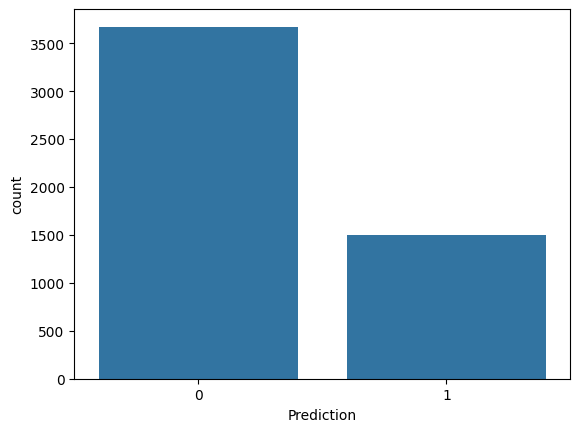

In [20]:
!pip install seaborn
import seaborn as sns 
sns.countplot(x=y)

In [21]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [25]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(X)

In [26]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [28]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size = 0.30)

In [29]:
x_scaled.shape

(5172, 3000)

In [30]:
x_train.shape

(3620, 3000)

In [31]:
x_test.shape

(1552, 3000)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5) 
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(x_test)

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,classification_report

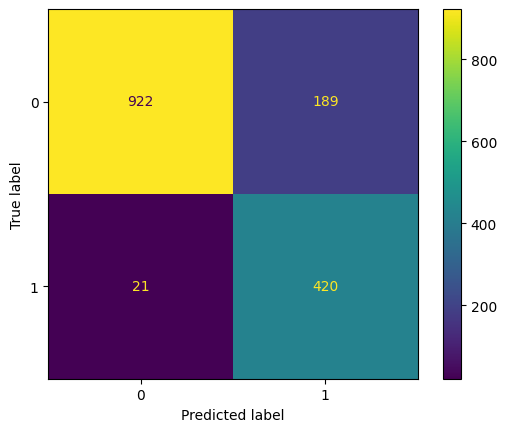

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [38]:
y_test.value_counts()

Prediction
0    1111
1     441
Name: count, dtype: int64

In [39]:
accuracy_score(y_test, y_pred)

0.8646907216494846

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1111
           1       0.69      0.95      0.80       441

    accuracy                           0.86      1552
   macro avg       0.83      0.89      0.85      1552
weighted avg       0.90      0.86      0.87      1552



In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined
error = []

# Loop through different values of k (number of neighbors)
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    # Calculate the error rate and append to the error list
    error.append(np.mean(y_pred != y_test))


In [52]:
error

[0.10824742268041238,
 0.10502577319587629,
 0.11855670103092783,
 0.11082474226804123,
 0.13530927835051546,
 0.12886597938144329,
 0.15914948453608246,
 0.15528350515463918,
 0.17719072164948454,
 0.17010309278350516,
 0.19974226804123713,
 0.19652061855670103,
 0.21520618556701032,
 0.21198453608247422,
 0.22809278350515463,
 0.22551546391752578,
 0.23904639175257733,
 0.23646907216494845,
 0.2538659793814433,
 0.25193298969072164,
 0.2654639175257732,
 0.26417525773195877,
 0.27448453608247425,
 0.27512886597938147,
 0.28865979381443296,
 0.2867268041237113,
 0.3015463917525773,
 0.3002577319587629,
 0.3086340206185567,
 0.30605670103092786,
 0.3131443298969072,
 0.3125,
 0.31894329896907214,
 0.3176546391752577,
 0.32989690721649484,
 0.3279639175257732,
 0.33634020618556704,
 0.33505154639175255,
 0.34085051546391754,
 0.3389175257731959]

In [54]:
nn = KNeighborsClassifier(n_neighbors =1) 
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [55]:
KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=1)

In [58]:
y_pred = knn.predict(x_test)

In [59]:
accuracy_score(y_test, y_pred)

0.6610824742268041

In [61]:
from sklearn.svm import SVC 
svm = SVC(kernel ='linear') 
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [64]:
y_pred=svm.predict(x_test)

In [65]:
accuracy_score(y_test, y_pred)

0.9755154639175257